In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = r'.\Boston.csv'
boston_df = pd.read_csv(file_path)

# Extract feature and target
x_train = boston_df[['rm']].values  # Convert to numpy array
y_train = boston_df['medv'].values  # Convert to numpy array

def compute_cost(x, y, w, b):
    m = x.shape[0]
    predictions = x.dot(w) + b
    errors = predictions - y
    total_cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return total_cost

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    predictions = x.dot(w) + b
    errors = predictions - y
    dj_dw = (1 / m) * x.T.dot(errors)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function, tolerance=1e-10):
    w = w_in
    b = b_in
    cost_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = cost_function(x, y, w, b)
        cost_history.append(cost)
        
        # Check for convergence
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
            print(f"Converged at iteration {i}: Cost {cost}")
            break
        
        if i % 1000 == 0:  # Print every 1000 iterations
            print(f"Iteration {i}: Cost {cost}, w {w}, b {b}")

    return w, b, cost_history

# Initialize parameters
w_init = np.zeros((x_train.shape[1],))  # Initialize weight to zero
b_init = 0
alpha = 0.01  # Set an appropriate learning rate
iterations = 1000000  # Set the number of iterations

# Run gradient descent
w_final, b_final, cost_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)

print(f"Optimized weight (w): {w_final}")
print(f"Optimized intercept (b): {b_final}")







Iteration 0: Cost 122.32900936634293, w [1.46095015], b 0.22532806324110674
Iteration 1000: Cost 27.81072618207122, w [4.19171501], b -3.4350252759499584
Iteration 2000: Cost 26.5259628932984, w [4.74803996], b -6.973873894603538
Iteration 3000: Cost 25.515824071371817, w [5.24133586], b -10.111787319127393
Iteration 4000: Cost 24.721607386882102, w [5.67874361], b -12.894189654142577
Iteration 5000: Cost 24.09715842181931, w [6.06659509], b -15.361358663138596
Iteration 6000: Cost 23.606188491845423, w [6.41050478], b -17.54900882514051
Iteration 7000: Cost 23.22016579723767, w [6.7154511], b -19.48880833374999
Iteration 8000: Cost 22.91665735068136, w [6.98584841], b -21.208837522584417
Iteration 9000: Cost 22.678025326145537, w [7.22561095], b -22.73399535323217
Iteration 10000: Cost 22.4904020695931, w [7.4382095], b -24.086359850001216
Iteration 11000: Cost 22.34288420618891, w [7.62672163], b -25.285507699076344
Iteration 12000: Cost 22.226899011052634, w [7.79387619], b -26.3487

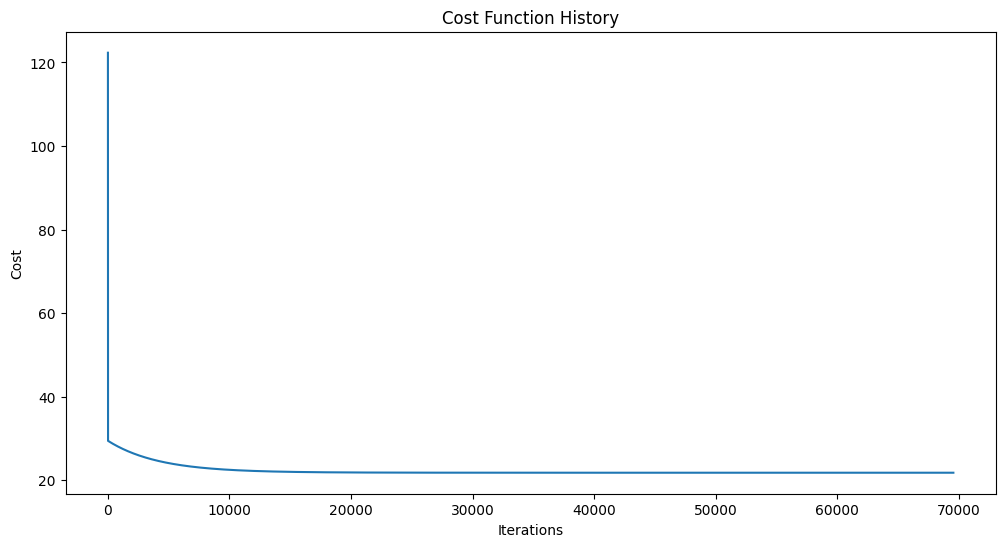

In [7]:
# Plotting the cost history
plt.figure(figsize=(12, 6))
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()


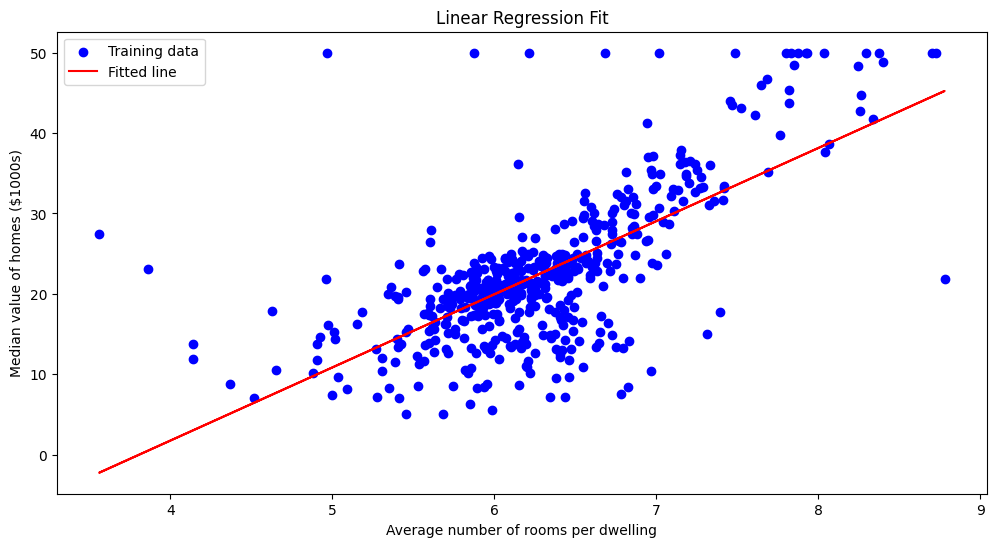

In [8]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.plot(x_train, x_train.dot(w_final) + b_final, color='red', label='Fitted line')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of homes ($1000s)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [9]:
# Comparison with scikit-learn
reg = LinearRegression().fit(x_train, y_train)
print(f"Scikit-learn weight (w): {reg.coef_[0]}")
print(f"Scikit-learn intercept (b): {reg.intercept_}")
print(f"Scikit-learn R²: {reg.score(x_train, y_train)}")

# Calculate predictions using scikit-learn model
y_pred_sklearn = reg.predict(x_train)

# Calculate predictions using gradient descent model
y_pred_gradient_descent = x_train.dot(w_final) + b_final

Scikit-learn weight (w): 9.102108981180308
Scikit-learn intercept (b): -34.670620776438554
Scikit-learn R²: 0.48352545599133423


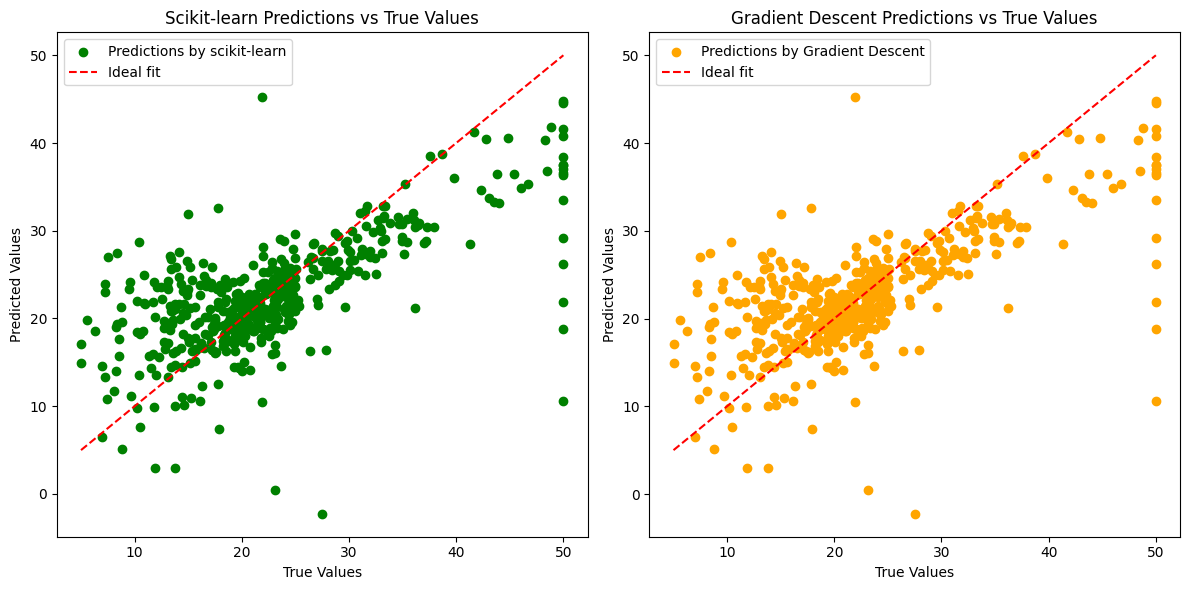

In [10]:
# Plot y_train vs. y_pred_sklearn and y_train vs. y_pred_gradient_descent
plt.figure(figsize=(12, 6))

# Plot for scikit-learn model
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_sklearn, color='green', label='Predictions by scikit-learn')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scikit-learn Predictions vs True Values')
plt.legend()

# Plot for gradient descent model
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_pred_gradient_descent, color='orange', label='Predictions by Gradient Descent')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Descent Predictions vs True Values')
plt.legend()

plt.tight_layout()
plt.show()